<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Classification - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1.  Does the report include a section describing the data?
2.  Does the report include a paragraph detailing the main objective(s) of this analysis?
3.  Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4.  Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5.  Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?


## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [2]:
titan=pd.read_csv("titanic.csv")

# 1. About the Data


In [3]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


My chosen data on passengers of the Titanic has 7 features namely PClass, Name, Sex, Age, Siblings aboard, Parents aboard and Fare and 1 label Survived indicating 1 for survived 0 for not.

In [4]:
titan.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
titan=titan.drop("Name",axis=1)

Here I have dropped the name column as for this problem we don't need this data.

In [6]:
titan.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
titan.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


Here we can see that we have 887 entries for each column of data. Since the numbers for all categories is the same we have o missing data in the dataset.

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
titan['Sex']=le.fit_transform(titan.Sex)

Since the data in the Sex column was categorical we have converted the values into numerical values. 1 is for male and 0 is for females

In [10]:
titan.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Siblings/Spouses Aboard'}>,
        <AxesSubplot:title={'center':'Parents/Children Aboard'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

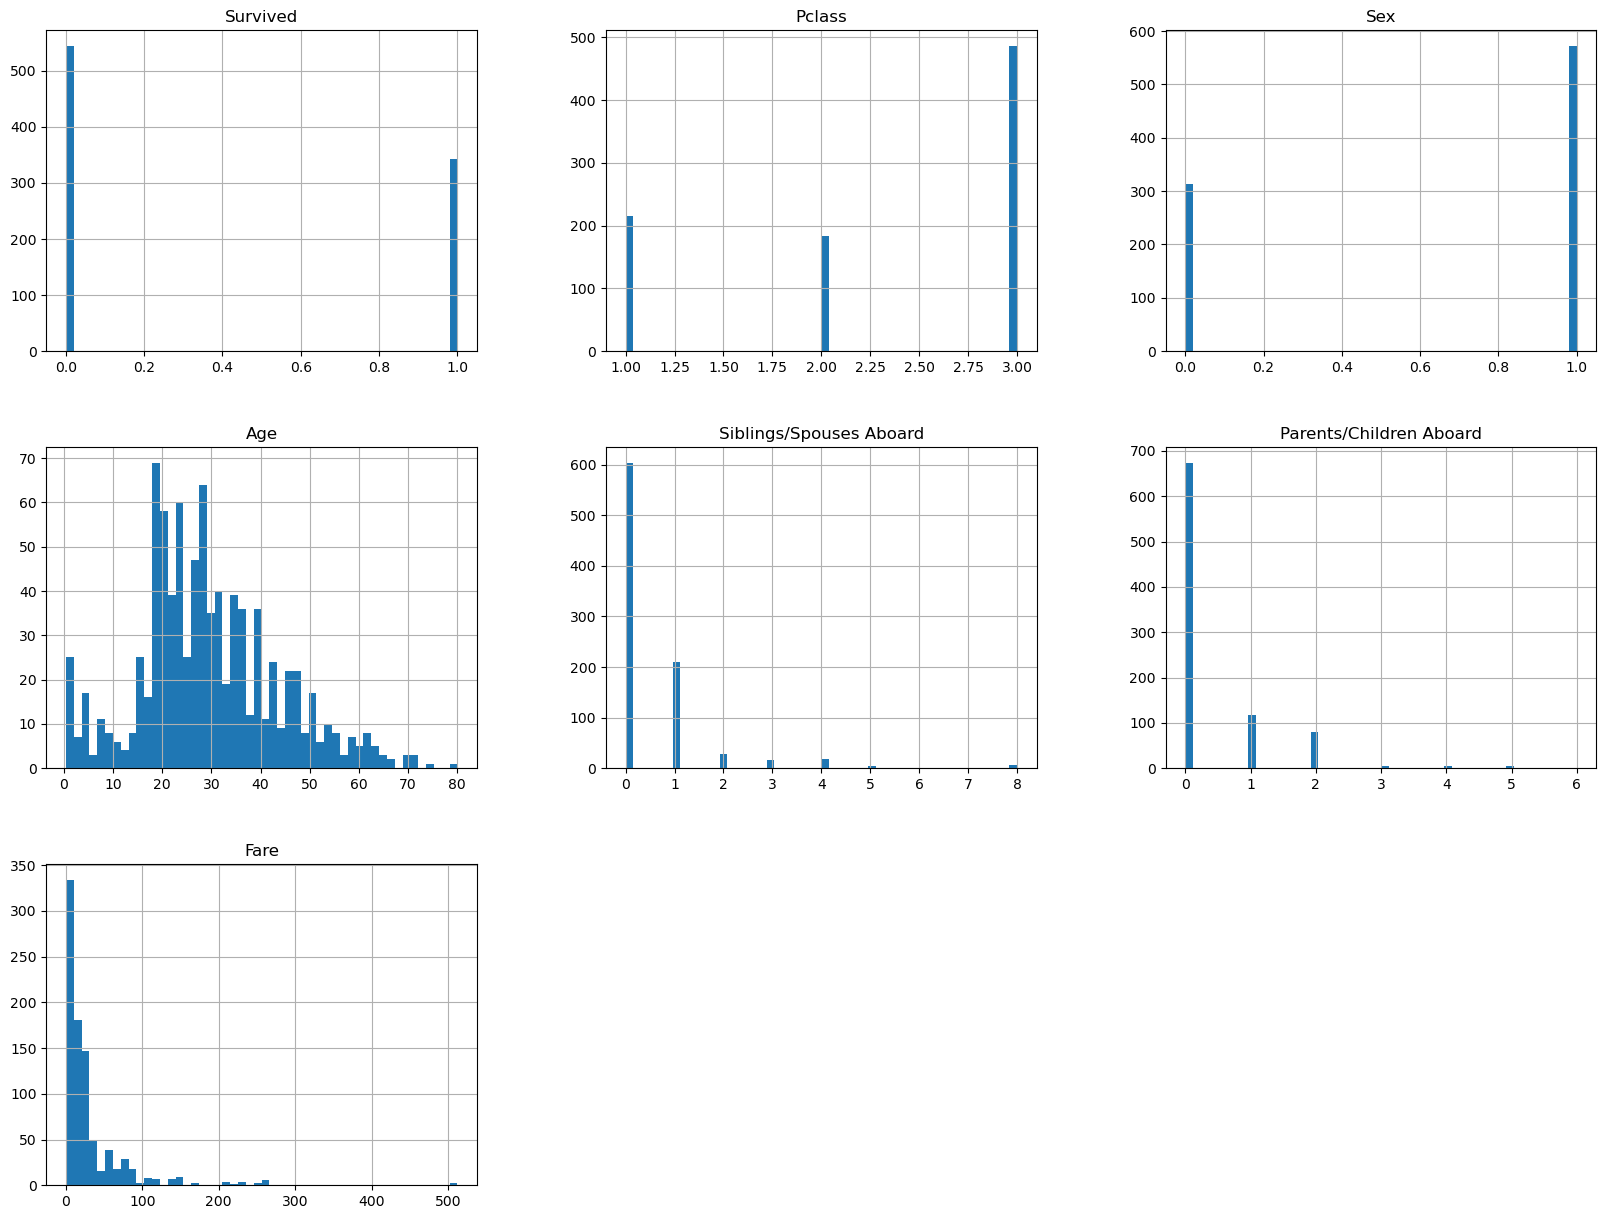

In [11]:
titan.hist(bins=50,figsize=(20,15))

SPLITTING THE DATA INTO TEST AND TRAINING DATA

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)
for train_index, test_index in split.split(titan,titan['Survived']):
    strat_train_set=titan.loc[train_index]
    strat_test_set=titan.loc[test_index]

In [13]:
strat_test_set['Survived'].value_counts()

0    109
1     69
Name: Survived, dtype: int64

In [14]:
strat_train_set['Survived'].value_counts()

0    436
1    273
Name: Survived, dtype: int64

The dataset has been split into 2 sets 'strat_test_set' and 'strat_train_set' and the ratio of survivers to non-survivors in both sets is approximately the same(0.75) to ensure more correct predictions.

In [15]:
titan= strat_train_set.drop("Survived", axis=1)
titan_label=strat_train_set["Survived"].copy()

In [16]:
y_test=strat_test_set["Survived"].copy()

# 2. Objectives


The objective is to check if a person with given properties survived on the Titanic.

# 3. CLASSIFICATION Models


1) LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR=LR.fit(titan,titan_label)

In [18]:
some_data=titan.iloc[:5]
LR.predict(some_data)

array([1, 1, 0, 1, 0], dtype=int64)

In [19]:
X_test = strat_test_set.drop("Survived",axis=1)
Y_test = strat_test_set["Survived"].copy()
LR_prediction=LR.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Below are confusion matrix, accuracy score and classification report of the Logistic Regression model

In [21]:
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test,LR_prediction))
print("\nACCURACY SCORE:")
print(accuracy_score(y_test,LR_prediction))
print("\n\nCLASSIFICATION REPORT")
print(classification_report(y_test,LR_prediction))

CONFUSION MATRIX:
[[91 18]
 [22 47]]

ACCURACY SCORE:
0.7752808988764045


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.72      0.68      0.70        69

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.78      0.77       178



2)K NEAREST NEIGHBORS

In [22]:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier()

In [23]:
KNN=KNN.fit(titan,titan_label)
KNN_prediction=KNN.predict(X_test)

In [24]:
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test,KNN_prediction))
print("\nACCURACY SCORE:")
print(accuracy_score(y_test,KNN_prediction))
print("\n\nCLASSIFICATION REPORT")
print(classification_report(y_test,KNN_prediction))

CONFUSION MATRIX:
[[84 25]
 [34 35]]

ACCURACY SCORE:
0.6685393258426966


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       109
           1       0.58      0.51      0.54        69

    accuracy                           0.67       178
   macro avg       0.65      0.64      0.64       178
weighted avg       0.66      0.67      0.66       178



above are confusion matrix, accuracy score and classification report of the Logistic Regression model

3) SUPPORT VECTOR MACHINES

In [25]:
from sklearn.svm import LinearSVC
LinSVC = LinearSVC()

In [26]:
LinSVC=LinSVC.fit(titan,titan_label)
LinSVC_prediction=LinSVC.predict(X_test)

In [27]:
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test,LinSVC_prediction))
print("\nACCURACY SCORE:")
print(accuracy_score(y_test,LinSVC_prediction))
print("\n\nCLASSIFICATION REPORT")
print(classification_report(y_test,LinSVC_prediction))

CONFUSION MATRIX:
[[104   5]
 [ 51  18]]

ACCURACY SCORE:
0.6853932584269663


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       109
           1       0.78      0.26      0.39        69

    accuracy                           0.69       178
   macro avg       0.73      0.61      0.59       178
weighted avg       0.71      0.69      0.63       178



4)DECISION TREE CLASSIFIER

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
DTC=DecisionTreeClassifier()

In [30]:
DTC=DTC.fit(titan,titan_label)
DTC_prediction=DTC.predict(X_test)

In [31]:
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test,DTC_prediction))
print("\nACCURACY SCORE:")
print(accuracy_score(y_test,DTC_prediction))
print("\n\nCLASSIFICATION REPORT")
print(classification_report(y_test,DTC_prediction))

CONFUSION MATRIX:
[[88 21]
 [24 45]]

ACCURACY SCORE:
0.7471910112359551


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       109
           1       0.68      0.65      0.67        69

    accuracy                           0.75       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.75      0.75      0.75       178



5)BAGGING TREES

In [32]:
from sklearn.ensemble import BaggingClassifier

In [33]:
BC=BaggingClassifier()

In [34]:
BC=BC.fit(titan,titan_label)
BC_prediction=BC.predict(X_test)

In [35]:
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test,BC_prediction))
print("\nACCURACY SCORE:")
print(accuracy_score(y_test,BC_prediction))
print("\n\nCLASSIFICATION REPORT")
print(classification_report(y_test,BC_prediction))

CONFUSION MATRIX:
[[91 18]
 [21 48]]

ACCURACY SCORE:
0.7808988764044944


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.73      0.70      0.71        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



6) EXTRA RANDOM TREES

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
EC=ExtraTreesClassifier()

In [38]:
EC=EC.fit(titan,titan_label)
EC_prediction=EC.predict(X_test)
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test,EC_prediction))
print("\nACCURACY SCORE:")
print(accuracy_score(y_test,EC_prediction))
print("\n\nCLASSIFICATION REPORT")
print(classification_report(y_test,EC_prediction))

CONFUSION MATRIX:
[[83 26]
 [21 48]]

ACCURACY SCORE:
0.7359550561797753


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       109
           1       0.65      0.70      0.67        69

    accuracy                           0.74       178
   macro avg       0.72      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178



7) GRADIENT BOOST

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
GBC= GradientBoostingClassifier()

In [41]:
GBC=GBC.fit(titan,titan_label)
GBC_prediction=GBC.predict(X_test)

In [42]:
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test,GBC_prediction))
print("\nACCURACY SCORE:")
print(accuracy_score(y_test,GBC_prediction))
print("\n\nCLASSIFICATION REPORT")
print(classification_report(y_test,GBC_prediction))

CONFUSION MATRIX:
[[97 12]
 [22 47]]

ACCURACY SCORE:
0.8089887640449438


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       109
           1       0.80      0.68      0.73        69

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



8)AdaBoost

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
ABC= AdaBoostClassifier()

In [45]:
ABC=ABC.fit(titan,titan_label)
ABC_prediction=ABC.predict(X_test)

In [46]:
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test,ABC_prediction))
print("\nACCURACY SCORE:")
print(accuracy_score(y_test,ABC_prediction))
print("\n\nCLASSIFICATION REPORT")
print(classification_report(y_test,ABC_prediction))

CONFUSION MATRIX:
[[87 22]
 [23 46]]

ACCURACY SCORE:
0.7471910112359551


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       109
           1       0.68      0.67      0.67        69

    accuracy                           0.75       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.75      0.75      0.75       178



# 4. Insights and key findings


At the time of making this report, the weighted averages of the models: 

LR=0.77, KNN=0.66, SVC= 0.63, DTC=0.75, BT=0.78, EC= 0.74, GBC=0.81 and ABC=0.75.

Based on weighted average of F1 scores of the 8 models, Gradient Boosting(0.81) method is the best method for prediction for this dataset.

# 5. Next Steps


Now, we know that Gradient Boosting is the most accurate model, we use it to predict some values and we will start by building a joblib file

In [51]:
from joblib import dump,load
dump(GBC,'IBMclassification.joblib')

['IBMclassification.joblib']

In [55]:
titan.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
851,3,0,18.0,0,1,9.3500
650,3,0,16.0,0,0,7.8292
103,3,1,37.0,2,0,7.9250
101,1,1,21.0,0,1,77.2875
292,3,1,24.0,0,0,7.8958


In [59]:
GBC.predict([[2,1,19,0,2,69]])

array([0], dtype=int64)

So, according to this model, a 19 year old male travelling in class 2 with no siblings onboard and both parents onboard paying 69 dollars fare wouldn't survive.

Since the available dataset is small, the accuracy of the predictions by this model isn't very high and the predictions might be wrong for a few case

In [61]:
GBC.predict([[3,0,18,0,1,9.35]])

array([1], dtype=int64)

For the above values taken and confirming the value in the dataset manually, I found this particular prediction to be accurate confirming this model's accuracy.

This is the end of the report made by me(Satwik Saurav) for Week 6 of Supervised Machine Learning: Classification course offered by IBM on Coursera. Thank you for reading this report.